In [11]:
import numpy as np
import pandas as pd

In [12]:
import prepostprocessing.cleaning as cleaning
import prepostprocessing.pre_processing as preproc
from qapf import qapf
from qapf import cipw

___

# CIPWFULL normalized data

## Convert to CIPWFULL format

**I used an arbitrary version of the mineralogical data, not sure if this is the correct one** -->is a good one

In [13]:
mineralogy_original = pd.read_excel("../_PETRO/classification_altereddata.xlsx", index_col=0)
# Only iterested in sample number and oxides
mineralogy = mineralogy_original[['SiO2', 'TiO2', 'Al2O3', 'Fe2O3','FeO', 'MnO', 'MgO', 'CaO', 'Na2O', 'K2O', 'P2O5', 'l.i.', 'oth']]
mineralogy.columns

Index(['SiO2', 'TiO2', 'Al2O3', 'Fe2O3', 'FeO', 'MnO', 'MgO', 'CaO', 'Na2O',
       'K2O', 'P2O5', 'l.i.', 'oth'],
      dtype='object')

In [14]:
# Check for closed sum
assert all(np.isclose(mineralogy.sum(axis=1), 100.0))

In [15]:
# Remove 'l.i.'' and 'oth' columns and immediately normalize data
mineralogy = preproc.normalize(mineralogy.drop(["l.i.", "oth", "P2O5"], axis=1))

In [16]:
# Check for closed sum
assert all(np.isclose(mineralogy.sum(axis=1), 100.0))

In [17]:
mineralogy.head()

SiO2      TiO2      Al2O3     Fe2O3       FeO       MnO       MgO  \
1  80.897076  0.040048  10.172207  0.610733  1.722066  0.010012  0.400481   
2  80.726539  0.100908  10.191726  0.171544  0.565086  0.020182  0.403633   
3  80.784393  0.050541   9.996968  0.161731  1.748711  0.020216  0.121298   
4  79.324768  0.039837   9.600637  1.145304  0.746938  0.099592  0.448163   
5  80.239157  0.081070  10.376976  0.648561  2.634779  0.040535  0.050669   

        CaO      Na2O       K2O  
1  0.550661  2.002403  3.594313  
2  0.353179  2.320888  5.146317  
3  0.141514  0.758112  6.216517  
4  0.667264  3.694851  4.232646  
5  1.266721  1.540332  3.121200

In [18]:
cipw.convert_to_CIPWFULL_format(mineralogy, "../_CIPW/CIPW/1_normalized.txt", dataset_name="Vistelius (1995)")

_____

## Extract results from CIPWFULL results file

**I only selected quartz, plagioclase and alkali feldspar here as they are of interest to us for the QAPF classification**  
**Feel free to extract addiotnal minerals if they would be of any interest to you**

**Not sure what to do with albite in the final assignments as by the book it should be accounted for as an alkali feldspar and thus be included in the sum of plagioclase but then the resulting plagioclase contents seem quite low.   
This is something you might look into although the method used here seems to be correct according to te resulting QAPF diagram.**

--> indeed when reading the paper of Streckeisen (and other sources), albite should be accounted for as an alkali feldspar, also saw that the datapoints were generally located more to the right side (plagioclase), maybe an overestimation of plagioclase?

--> I changed the settings below so that albite belongs to the alkali feldspars, Think this figure should be more correct according to the papers, but the cotent of plagioclase is indeed quite low. 

In [19]:
df_final1 = cipw.extract_CIPW_results("../_CIPW/CIPW/1_normalized_results_excel.txt")

In [20]:
df_final1

Q          P          K
 SAMPLE                                   
 1         52.526539  17.979983  22.933498
 2         45.821201  19.425633  32.374005
 3         50.716606   6.475010  37.375668
 4         41.397182  23.234657  27.592905
 5         54.609970  18.013528  19.746868
...              ...        ...        ...
 4655       0.000000  59.865509  15.514612
 4656       0.000000  52.355599  12.039131
 4657       0.000000  51.797900  15.759357
 4658       0.000000  71.436466  10.147088
 4659       2.241269  59.889595   6.852647

[4659 rows x 3 columns]

## QAPF classification

In [21]:
df_final1["QAPF"] = qapf.check_QAPF_region(df_final1)

In [22]:
df_final1["QAPF"].unique()

array(['monzo granite', 'syeno granite', 'granodiorite', 'tonalite',
       'quartz-rich granitoid', 'quartz monzonite',
       'quartz monzodiorite\nquartz monzogabbro', 'monzonite',
       'quartz syenite',
       'quartz diorite\nquartz gabbro\nquartz anorthosite',
       'monzodiorite monzogabbro', 'diorite gabbro anorthosite'],
      dtype=object)

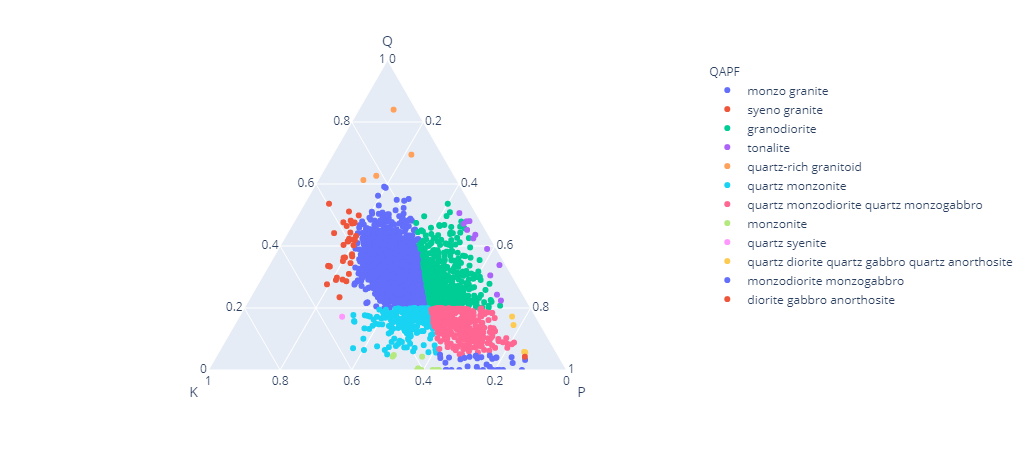

In [23]:
import plotly.express as px
import plotly.graph_objects as go

fig = px.scatter_ternary(df_final1, a="Q", b="K", c="P", color="QAPF")

fig.write_image(f"../_FIGURES/qapf_ternary/1_normalized_QAPF.pdf")
fig.show()

In [24]:
df_final1.to_excel("../_CIPW/CIPW/1_normalized.xlsx", index=True)

-------

# CIPWFULL Albite entirely to alkali feldspar

**remark**
making changes to cipw.py is necessairy! 

## Convert to CIPWFULL format

In [7]:
mineralogy_alb_original = pd.read_excel("../_PETRO/classification_altereddata.xlsx", index_col=0)
# Only iterested in sample number and oxides
mineralogy_alb = mineralogy_alb_original[['SiO2', 'TiO2', 'Al2O3', 'Fe2O3','FeO', 'MnO', 'MgO', 'CaO', 'Na2O', 'K2O', 'P2O5', 'l.i.', 'oth']]
mineralogy_alb = preproc.replace_nan(mineralogy_alb, "0.01")
mineralogy_alb

SiO2      TiO2      Al2O3     Fe2O3       FeO       MnO       MgO  \
1     80.598504  0.039900  10.134663  0.608479  1.715711  0.009975  0.399002   
2     80.272928  0.100341  10.134457  0.170580  0.561910  0.020068  0.401365   
3     79.888045  0.049980   9.886046  0.159936  1.729308  0.019992  0.119952   
4     79.104181  0.039726   9.573940  1.142119  0.744860  0.099315  0.446916   
5     78.707753  0.079523  10.178926  0.636183  2.584493  0.039761  0.049702   
...         ...       ...        ...       ...       ...       ...       ...   
4655  50.977849  0.389144  19.397326  4.081022  4.959090  0.219517  3.781680   
4656  50.768003  0.997407  17.713944  2.603232  8.966687  0.099741  5.056852   
4657  50.214207  1.145761  17.963535  4.194480  5.200757  0.159410  5.818472   
4658  50.139442  1.125498  21.922311  2.270916  4.163347  0.099602  2.719124   
4659  50.059844  0.797925  19.399561  5.316178  4.089368  0.009974  4.927189   

            CaO      Na2O       K2O      P2O5      l.i.       oth  
1      0.548628  1.995012  3.581047  0.009975  0.349127  0.009975  
2      0.351194  2.307847  5.117399  0.050171  0.501706  0.010034  
3      0.139944  0.749700  6.147541  0.009996  1.019592  0.079968  
4      0.665409  3.684576  4.220876  0.009931  0.258218  0.009931  
5      1.242545  1.510934  3.061630  0.009940  1.739563  0.159046  
...         ...       ...       ...       ...       ...       ...  
4655   8.002395  4.110956  2.005588  0.588705  1.476751  0.009978  
4656   8.438061  2.653102  1.635747  0.259326  0.797925  0.009974  
4657   8.418850  2.670121  2.231743  0.468267  1.484507  0.029889  
4658   9.372510  4.043825  1.085657  0.458167  2.589641  0.009960  
4659  11.300618  2.832635  0.748055  0.009974  0.478755  0.029922  

[4659 rows x 13 columns]

In [8]:
assert all(np.isclose(mineralogy_alb.sum(axis=1), 100.0))

In [9]:
# Remove 'l.i.'' and 'oth' columns and immediately normalize data
mineralogy_alb = preproc.normalize(mineralogy_alb.drop(["l.i.", "oth", "P2O5"], axis=1))

In [10]:
# Check for closed sum
assert all(np.isclose(mineralogy_alb.sum(axis=1), 100.0))

In [11]:
mineralogy_alb.head()

SiO2      TiO2      Al2O3     Fe2O3       FeO       MnO       MgO  \
1  80.888978  0.040044  10.171188  0.610672  1.721894  0.010011  0.400440   
2  80.685830  0.100857  10.186586  0.171457  0.564801  0.020171  0.403429   
3  80.776228  0.050536   9.995957  0.161714  1.748534  0.020214  0.121286   
4  79.316869  0.039833   9.599681  1.145190  0.746863  0.099582  0.448118   
5  80.231026  0.081062  10.375925  0.648495  2.634512  0.040531  0.050664   

        CaO      Na2O       K2O      P2O5  
1  0.550606  2.002202  3.593953  0.010011  
2  0.353001  2.319718  5.143722  0.050429  
3  0.141500  0.758035  6.215888  0.010107  
4  0.667198  3.694483  4.232225  0.009958  
5  1.266592  1.540176  3.120884  0.010133

**remark**
changing the normalization factor in the convert_to_CIWFULL_format

In [12]:
cipw.convert_to_CIPWFULL_format(mineralogy_alb, "../_CIPW/CIPW/3_albite_feldspar.txt", dataset_name="Vistelius (1995)")


## Extract results from CIPWFULL results file

In [54]:
df_final4 = cipw.extract_CIPW_results("../_CIPW/CIPW/3_albite_feldspar_results_excel.txt")

In [56]:
df_final4.to_excel("../_CIPW/CIPW/3_albite_feldspar_QAPF.xlsx", index=True)

**removing the negative values**

## QAPF classification

In [66]:
df_final2 = pd.read_excel("../_CIPW/CIPW/3.1_albite_feldspar_QAPF.xlsx", index_col=0)

In [70]:
df_final2["QAPF"].unique()

array(['alkali feldspar granite', 'syeno granite',
       'quartz-rich granitoid', 'granodiorite', 'monzo granite',
       'quartz alkali\nfeldspar syenite', 'quartz syenite',
       'alkali feldspar syenite', 'quartz monzonite', 'syenite',
       'monzonite'], dtype=object)

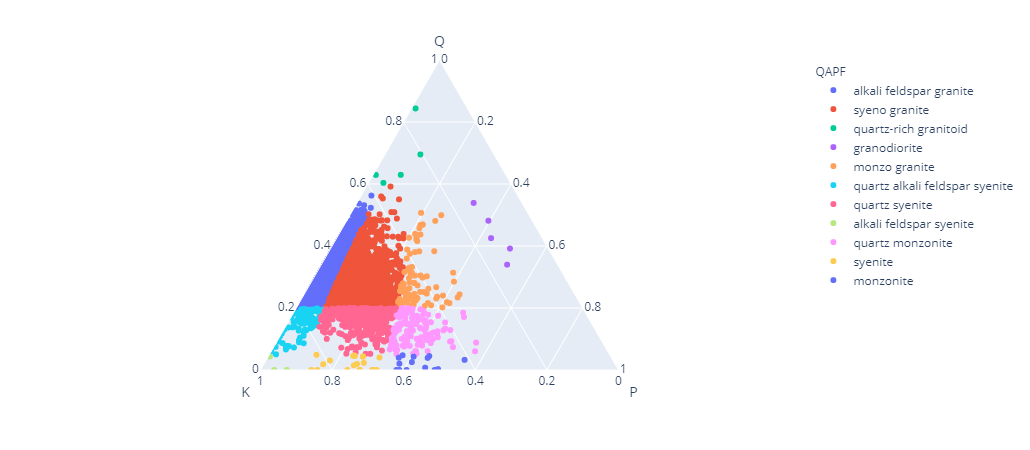

In [73]:
import plotly.express as px
import plotly.graph_objects as go

fig = px.scatter_ternary(df_final2, a="Q", b="K", c="P", color="QAPF")

fig.write_image(f"../_FIGURES/qapf_ternary/3_albite_feldspar_qapf_ternary.pdf")
fig.show()

In [74]:
df_final2.to_excel("../_CIPW/CIPW/3_albite_feldspar_QAPF.xlsx", index=True)

------

# CIPWFULL non_normalized data

## Convert to CIPWFULL format

In [15]:
original_nonnormalized = pd.read_excel("../_CLEANED/Vistelius_data_cleaned.xlsx", index_col=0)
# Only iterested in sample number and oxides
nonnormalized = original_nonnormalized[['SiO2', 'TiO2', 'Al2O3', 'Fe2O3','FeO', 'MnO', 'MgO', 'CaO', 'Na2O', 'K2O', 'P2O5']]
nonnormalized = preproc.replace_nan(nonnormalized, "0.01")
nonnormalized

SiO2  TiO2  Al2O3 Fe2O3   FeO   MnO   MgO    CaO  Na2O   K2O  P2O5
1     80.80  0.04  10.16  0.61  1.72  0.01   0.4   0.55  2.00  3.59  0.01
2     80.00   0.1  10.10  0.17  0.56  0.02   0.4   0.35  2.30  5.10  0.05
3     79.92  0.05   9.89  0.16  1.73  0.02  0.12   0.14  0.75  6.15  0.01
4     79.65  0.04   9.64  1.15  0.75   0.1  0.45   0.67  3.71  4.25  0.01
5     79.18  0.08  10.24  0.64  2.60  0.04  0.05   1.25  1.52  3.08  0.01
...     ...   ...    ...   ...   ...   ...   ...    ...   ...   ...   ...
4655  51.09  0.39  19.44  4.09  4.97  0.22  3.79   8.02  4.12  2.01  0.59
4656  50.90     1  17.76  2.61  8.99   0.1  5.07   8.46  2.66  1.64  0.26
4657  50.40  1.15  18.03  4.21  5.22  0.16  5.84   8.45  2.68  2.24  0.47
4658  50.34  1.13  22.01  2.28  4.18   0.1  2.73   9.41  4.06  1.09  0.46
4659  50.19   0.8  19.45  5.33  4.10  0.01  4.94  11.33  2.84  0.75  0.01

[4659 rows x 11 columns]

In [16]:
nonnormalized.head()

SiO2  TiO2  Al2O3 Fe2O3   FeO   MnO   MgO   CaO  Na2O   K2O  P2O5
1  80.80  0.04  10.16  0.61  1.72  0.01   0.4  0.55  2.00  3.59  0.01
2  80.00   0.1  10.10  0.17  0.56  0.02   0.4  0.35  2.30  5.10  0.05
3  79.92  0.05   9.89  0.16  1.73  0.02  0.12  0.14  0.75  6.15  0.01
4  79.65  0.04   9.64  1.15  0.75   0.1  0.45  0.67  3.71  4.25  0.01
5  79.18  0.08  10.24  0.64  2.60  0.04  0.05  1.25  1.52  3.08  0.01

In [17]:
cipw.convert_to_CIPWFULL_format(nonnormalized, "../_CIPW/CIPW/2_nonnormalized.txt", dataset_name="Vistelius (1995)")

## Extract results from CIPWFULL results file

In [18]:
df_final3 = cipw.extract_CIPW_results("../_CIPW/CIPW/2_nonnormalized_results_excel.txt")


In [19]:
df_final3

Q          P          K
 SAMPLE                                   
 1         52.491692  17.893107  22.905999
 2         45.549942  18.924143  32.082619
 3         50.202160   6.340434  36.975732
 4         41.581013  23.329923  27.706016
 5         53.917336  17.710443  19.486211
...              ...        ...        ...
 4655       0.000000  59.987350  15.363331
 4656       0.184801  51.931521  11.941629
 4657       0.491476  50.958777  15.504030
 4658       0.000000  69.529093   9.876165
 4659       2.249557  59.733916   6.834804

[4659 rows x 3 columns]

## QAPF classification

In [20]:
df_final3["QAPF"] = qapf.check_QAPF_region(df_final3)

In [21]:
df_final3["QAPF"].unique()

array(['monzo granite', 'syeno granite', 'quartz-rich granitoid',
       'granodiorite', 'tonalite', 'quartz monzonite',
       'quartz monzodiorite\nquartz monzogabbro', 'monzonite',
       'quartz syenite',
       'quartz diorite\nquartz gabbro\nquartz anorthosite',
       'monzodiorite monzogabbro', 'diorite gabbro anorthosite'],
      dtype=object)

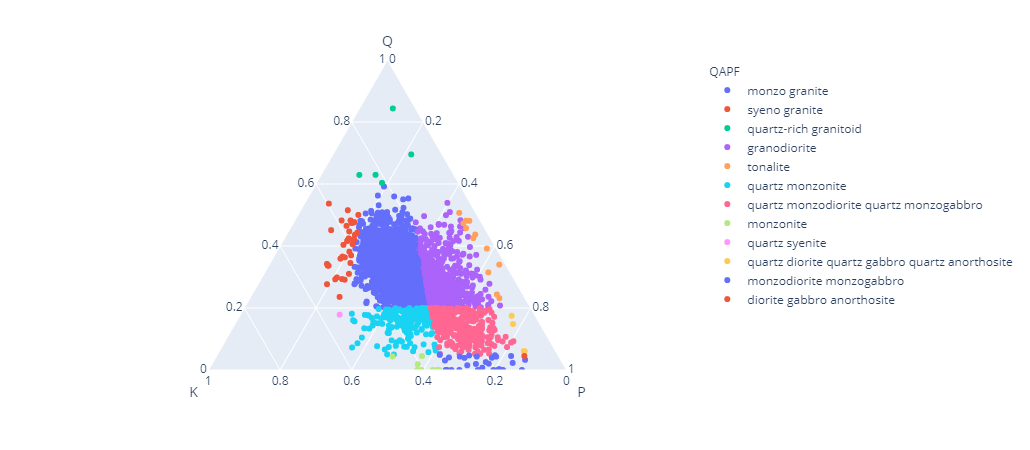

In [22]:
import plotly.express as px
import plotly.graph_objects as go

fig = px.scatter_ternary(df_final3, a="Q", b="K", c="P", color="QAPF")

fig.write_image(f"../_FIGURES/qapf_ternary/2_nonormalized_QAPF.pdf")
fig.show()

In [23]:
df_final3.to_excel("../_CIPW/CIPW/2_nonnormalized.xlsx", index=True)

-----

# Check alkalinity

**Remark**
wanted to check if both calculations delivered the same results--> there are some differences

In [40]:
check_alkalinity1 = pd.read_excel("../_CIPW/CIPW/1_normalized_all_results.xlsx", index=1, usecols=[19])
check_alkalinity2 = pd.read_excel("../_CIPW/CIPW/2_nonnormalized_all_results.xlsx", index=1, usecols=[20])

In [41]:
check_alkalinity1

ALKALINITY
0     PERALUMINOUS
1     PERALUMINOUS
2     PERALUMINOUS
3     PERALKALINE 
4     PERALUMINOUS
...            ...
4655  METALUMINOUS
4656  METALUMINOUS
4657  METALUMINOUS
4658  METALUMINOUS
4659    ALKALINITY

[4660 rows x 1 columns]

In [42]:
check_alkalinity1.iloc[:, 0].value_counts().to_excel("../_CIPW/CIPW/1_ASI_counts_normalized.xlsx")
check_alkalinity2.iloc[:, 0].value_counts().to_excel("../_CIPW/CIPW/2_ASI_counts_nonnormalized.xlsx")

**remark**
almost the same, nonnormalized = one peraluminous sample more

-----

# creating data to plot QAPF in Qgis

In [43]:
QAPF_plot = pd.read_excel("../_PETRO/classification_altereddata.xlsx", index_col=0, usecols=[0, 5, 6])
QAPF = pd.read_excel("../_CIPW/CIPW/1_normalized.xlsx", index_col=0)
#QAPF_plot_nonorm = pd.read_excel("../_PETRO/classification_altereddata.xlsx", index_col=0, usecols=[0, 5, 6])
#QAPF_nonorm = pd.read_excel("../_CIPW/non_normalized_QAPF.xlsx", index_col=0)
QAPF_plot_totnonorm = pd.read_excel("../_PETRO/classification_altereddata.xlsx", index_col=0, usecols=[0, 5, 6])
QAPF_totnonorm = pd.read_excel("../_CIPW/CIPW/2_nonnormalized.xlsx", index_col=0)

In [44]:
QAPF

Q          P          K                      QAPF
 SAMPLE                                                           
1        52.526539  17.979983  22.933498             monzo granite
2        45.821201  19.425633  32.374005             monzo granite
3        50.716606   6.475010  37.375668             syeno granite
4        41.397182  23.234657  27.592905             monzo granite
5        54.609970  18.013528  19.746868             monzo granite
...            ...        ...        ...                       ...
4655      0.000000  59.865509  15.514612  monzodiorite monzogabbro
4656      0.000000  52.355599  12.039131  monzodiorite monzogabbro
4657      0.000000  51.797900  15.759357  monzodiorite monzogabbro
4658      0.000000  71.436466  10.147088  monzodiorite monzogabbro
4659      2.241269  59.889595   6.852647  monzodiorite monzogabbro

[4659 rows x 4 columns]

In [45]:
QAPF_plot.insert(2, "QAPF", QAPF['QAPF']) 
#QAPF_plot_nonorm.insert(2, "QAPF", QAPF_nonorm['QAPF']) 
QAPF_plot_totnonorm.insert(2, "QAPF", QAPF_totnonorm['QAPF']) 

In [47]:
QAPF_plot

Latitude     Longitude                      QAPF
1     44°31'30.0"  138°37'30.0"             monzo granite
2     54°12'10.0"   119°24'0.0"             monzo granite
3      62°36'0.0"   155°36'0.0"             syeno granite
4      61°35'0.0"    146°2'0.0"             monzo granite
5      68°55'0.0"   164°24'0.0"             monzo granite
...           ...           ...                       ...
4655   66°42'0.0"   164°23'0.0"  monzodiorite monzogabbro
4656  46°56'30.0"    137°5'3.0"  monzodiorite monzogabbro
4657   58°12'0.0"   138°12'0.0"  monzodiorite monzogabbro
4658   60°51'0.0"   147°31'0.0"  monzodiorite monzogabbro
4659   66°19'0.0"   165°30'0.0"  monzodiorite monzogabbro

[4659 rows x 3 columns]

In [48]:
QAPF_plot.to_excel("../_CIPW/CIPW/1_normalized_QAPF_plot.xlsx", index=True)
#QAPF_plot_nonorm.to_excel("../_CIPW/QAPF_plot_non_normalized.xlsx", index=True)
QAPF_plot_totnonorm.to_excel("../_CIPW/CIPW/2_nonnormalized_QAPF_plot.xlsx", index=True)

In [49]:
QAPF_plot.iloc[:, 2].value_counts().to_excel("../_CIPW/CIPW/1_normalized_QAPF_count.xlsx")
#QAPF_plot_nonorm.iloc[:, 2].value_counts().to_excel("../_CIPW/QAPF_count_non_normalized.xlsx")
#QAPF_plot_totnonorm.iloc[:, 2].value_counts().to_excel("../_CIPW/CIPW/2_nonnormalized_QAPF_count.xlsx")

**remark**
Classificaton is entirely the same --> also no differences can be seen on the ternairy diagrams, points don't even move a little bit

------

# checking QAPF with classification in Vistelius

**remark**
checked if there are a lot of differences and remarkable features between the two datasets. there are some differences, but that's logical i think, but in general it looked ok.  


In [50]:
Vist_check = pd.read_excel("../_Results/text_temp_cleaned_handmatig_finalversion.xlsx", index_col=0, usecols=[0, 8])
QAPF1 = pd.read_excel("../_CIPW/CIPW/1_normalized.xlsx", index_col=0)
QAPF2 = pd.read_excel("../_CIPW/CIPW/2_nonnormalized.xlsx", index_col=0)
QAPF3 = pd.read_excel("../_CIPW/QAPF.xlsx", index_col=0)

In [51]:
QAPF1

Q          P          K                      QAPF
 SAMPLE                                                           
1        52.526539  17.979983  22.933498             monzo granite
2        45.821201  19.425633  32.374005             monzo granite
3        50.716606   6.475010  37.375668             syeno granite
4        41.397182  23.234657  27.592905             monzo granite
5        54.609970  18.013528  19.746868             monzo granite
...            ...        ...        ...                       ...
4655      0.000000  59.865509  15.514612  monzodiorite monzogabbro
4656      0.000000  52.355599  12.039131  monzodiorite monzogabbro
4657      0.000000  51.797900  15.759357  monzodiorite monzogabbro
4658      0.000000  71.436466  10.147088  monzodiorite monzogabbro
4659      2.241269  59.889595   6.852647  monzodiorite monzogabbro

[4659 rows x 4 columns]

In [52]:
Vist_check.insert(1, "QAPF_normalized", QAPF1['QAPF']) 
Vist_check.insert(1, "QAPF_nonnormalized", QAPF2['QAPF'])
Vist_check.insert(1, "QAPF_albite_wrong", QAPF3['QAPF']) 

In [53]:
Vist_check

type_granite           QAPF_albite_wrong  \
1                  Granite leucogranitic               monzo granite   
2                    Granite leucocratic               monzo granite   
3     Granite leucocratic coarse-grained               syeno granite   
4                    Granite leucocratic               monzo granite   
5       Granite-porphyry micropegmatitic               monzo granite   
...                                  ...                         ...   
4655                             Diorite    monzodiorite monzogabbro   
4656                      Quartz diorite    monzodiorite monzogabbro   
4657                             Diorite    monzodiorite monzogabbro   
4658                             Diorite  diorite gabbro anorthosite   
4659                             Diorite  diorite gabbro anorthosite   

            QAPF_nonnormalized           QAPF_normalized  
1                monzo granite             monzo granite  
2                monzo granite             monzo granite  
3                syeno granite             syeno granite  
4                monzo granite             monzo granite  
5                monzo granite             monzo granite  
...                        ...                       ...  
4655  monzodiorite monzogabbro  monzodiorite monzogabbro  
4656  monzodiorite monzogabbro  monzodiorite monzogabbro  
4657  monzodiorite monzogabbro  monzodiorite monzogabbro  
4658  monzodiorite monzogabbro  monzodiorite monzogabbro  
4659  monzodiorite monzogabbro  monzodiorite monzogabbro  

[4659 rows x 4 columns]

In [54]:
Vist_check.to_excel("../_CIPW/CIPW/QAPF_Check.xlsx", index=True)

-----